In [2]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading Data
dataset = load_dataset("husainaliarif/Covid19")
df = dataset["train"].to_pandas()

In [3]:
df_GR = df[(df["continent"] == "Europe") & (df["location"] == "Greece")].copy()
df_GR["date"] = pd.to_datetime(df_GR["date"])
df_GR["year"] = pd.to_datetime(df_GR["date"]).dt.year
df_GR["month"] = pd.to_datetime(df_GR["date"]).dt.month
df_GR["month"] = df_GR["month"].apply(lambda x: pd.to_datetime(x, format="%m").strftime("%b"))
df_GR = df_GR.sort_values(by="date", ascending=False)

df_GR

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,year,month
35888,GRC,Europe,Greece,2021-06-29,421829.0,563.0,12676.0,13.0,NaN,NaN,...,4.55,35.3,52.0,NaN,4.21,82.24,0.888,NaN,2021,Jun
35887,GRC,Europe,Greece,2021-06-28,421266.0,361.0,12663.0,8.0,NaN,NaN,...,4.55,35.3,52.0,NaN,4.21,82.24,0.888,NaN,2021,Jun
35886,GRC,Europe,Greece,2021-06-27,420905.0,235.0,12655.0,18.0,NaN,NaN,...,4.55,35.3,52.0,NaN,4.21,82.24,0.888,NaN,2021,Jun
35885,GRC,Europe,Greece,2021-06-26,420670.0,375.0,12637.0,12.0,NaN,NaN,...,4.55,35.3,52.0,NaN,4.21,82.24,0.888,NaN,2021,Jun
35884,GRC,Europe,Greece,2021-06-25,420295.0,386.0,12625.0,21.0,NaN,NaN,...,4.55,35.3,52.0,NaN,4.21,82.24,0.888,NaN,2021,Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35396,GRC,Europe,Greece,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,...,4.55,35.3,52.0,NaN,4.21,82.24,0.888,6.41,2020,Feb
35395,GRC,Europe,Greece,2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,...,4.55,35.3,52.0,NaN,4.21,82.24,0.888,7.27,2020,Feb
35394,GRC,Europe,Greece,2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,...,4.55,35.3,52.0,NaN,4.21,82.24,0.888,NaN,2020,Jan
35393,GRC,Europe,Greece,2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,...,4.55,35.3,52.0,NaN,4.21,82.24,0.888,NaN,2020,Jan


In [4]:
# Averange new cases of the last 7 days
df_GR["cases_7d"] = df_GR["new_cases"].rolling(7).mean()
df_GR["cases_7d"].head(6).dropna()

Series([], Name: cases_7d, dtype: float64)

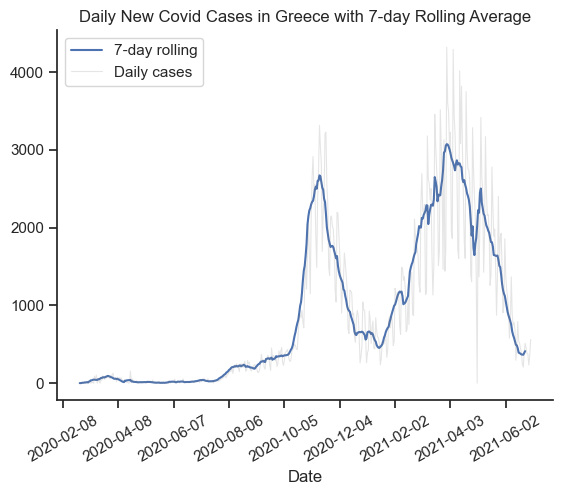

In [7]:
sns.lineplot(data=df_GR, x="date", y="cases_7d", label="7-day rolling")
sns.set_theme(style="ticks")
sns.despine()
plt.title("Daily New Covid Cases in Greece with 7-day Rolling Average")
plt.xlabel("Date")
plt.ylabel("")
plt.xticks(rotation=30)
plt.plot(df_GR["date"], df_GR["new_cases"], color='grey', linewidth=0.8, alpha=0.2, label="Daily cases")
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.legend()
plt.show()

In [6]:
mean_cases = df_GR["new_cases"].mean()
std_cases = df_GR["new_cases"].std()

df_GR["z-score"] = (df_GR["new_cases"] - mean_cases) / std_cases

df_clean = df_GR[abs(df_GR["z-score"]) < 3]
df_outliers = df_GR[abs(df_GR["z-score"]) >= 3]

df_outliers.value_counts("new_cases")

new_cases
4017.0    1
4293.0    1
4322.0    1
Name: count, dtype: int64

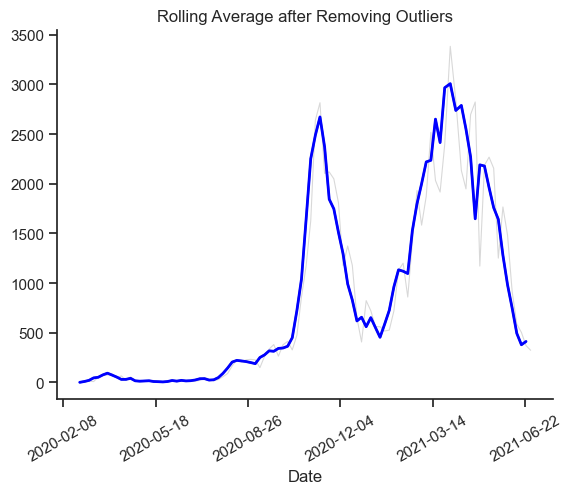

In [8]:
df_clean["date"] = pd.to_datetime(df_clean["date"])
df_clean = df_clean.sort_values(by="date")
df_plot = df_clean.loc[::5]
df_clean.loc[:, "new_cases_smoothed"] = df_clean["new_cases"].rolling(window=3).mean()

sns.lineplot(data=df_plot, x="date", y="cases_7d")
sns.set_theme(style="ticks")
sns.despine()
plt.title("Rolling Αverage after Removing Οutliers")
plt.xlabel("Date")
plt.ylabel("")
plt.xticks(rotation=30)
plt.plot(df_plot["date"], df_plot["new_cases_smoothed"], color='grey', linewidth=0.8, alpha=0.3, label="Daily cases")
plt.plot(df_plot["date"], df_plot["cases_7d"], color='blue', linewidth=2, label='7-day rolling')
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.show()